In [1]:
import matplotlib as mpl

mpl.rcParams.update({'font.size': 12})
mpl.rcParams['axes.formatter.useoffset'] = False

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import ternary
import numpy as np

import utils.load_grid as lg
from utils.load_cmaps import *



In [2]:
pgrid_dir = "data/shared/pgrid_earth_gridtest_14"
cases = lg.get_cases(pgrid_dir)
cvars = lg.load_cvars(cases)
ncases = len(cases)
helps, hvars = lg.load_helpfiles(cases)

Configs:   0%|          | 0/96 [00:00<?, ?it/s]

Helpfiles: 100%|██████████| 96/96 [00:01<00:00, 49.78it/s]


In [3]:
def make_ternary_scatter(l_loc,l_lbl, b_loc,b_lbl, r_loc,r_lbl, c_loc,c_lbl):
    scale = 100.0
    points = []
    for i in range(40):
        rnd = np.random.sample(3)
        rnd = rnd/np.sum(rnd) * scale
        points.append(rnd)

    # i = bottom axis
    # j = right axis
    # k = left axis

    npts = len(l_loc)
    locs = []
    vals = []
    for i in range(npts):
        locs.append([b_loc[i]*scale,r_loc[i]*scale, l_loc[i]*scale])
        vals.append(c_loc[i])

    # Do plot
    fig,ax = plt.subplots(figsize=(6,4))
    tfg, tax = ternary.figure(ax, scale=scale)

    cmap = sci_colormaps['batlow']
    vmin, vmax = np.amin(vals), np.amax(vals)
    tax.scatter(locs, c=vals, 
                vmin=vmin, vmax=vmax, colormap=cmap, colorbar=True, cbarlabel=c_lbl)
    
    tax.boundary(linewidth=2.0)
    tax.gridlines(color="black", multiple=scale/5)
    tax.ticks(axis='lbr', linewidth=1, multiple=scale/5, offset=0.02)
    tax.left_axis_label(  l_lbl, offset=0.12)
    tax.bottom_axis_label(b_lbl,  offset=0.07)
    tax.right_axis_label( r_lbl, offset=0.13)

    ax.set_axis_off()
    fig.tight_layout()
    tax.show()

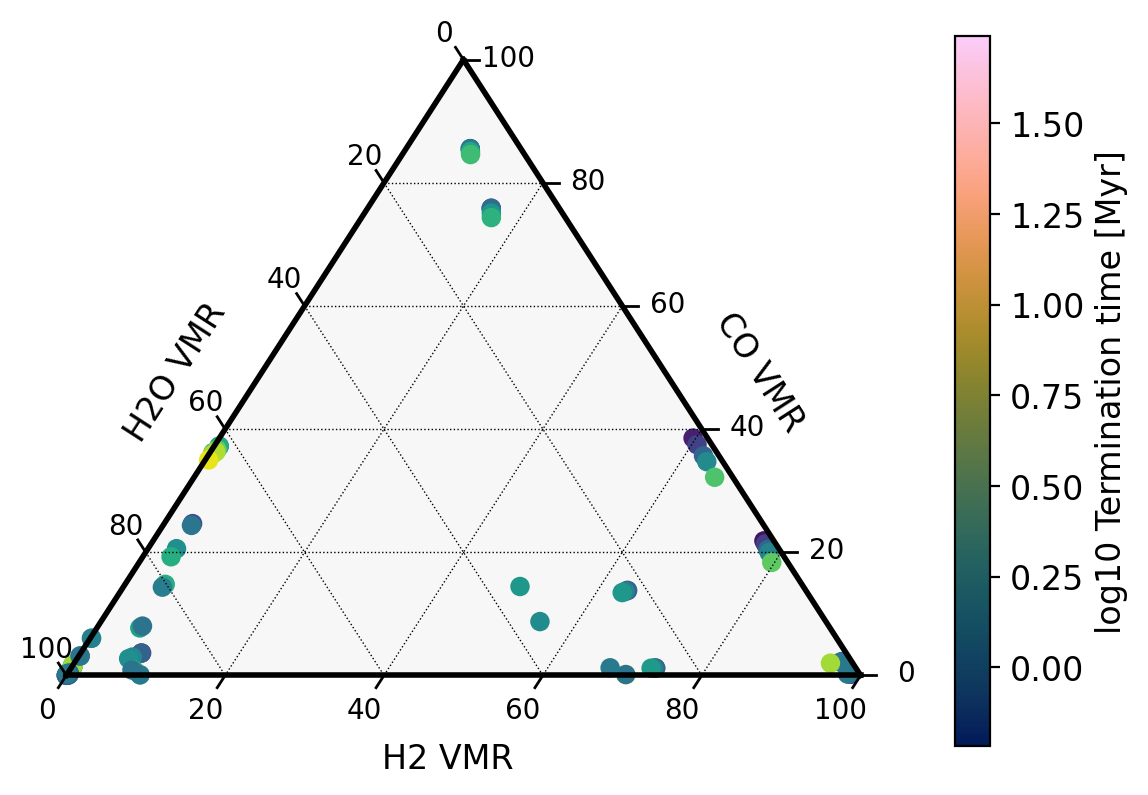

In [4]:
make_ternary_scatter(
    lg.access_hvars(hvars, "H2O_mr", -1), "H2O VMR",
    lg.access_hvars(hvars, "H2_mr", -1),  "H2 VMR",
    lg.access_hvars(hvars, "CO_mr", -1),  "CO VMR",
    np.log10(lg.access_hvars(hvars, "Time", -1)/1e6),  "log10 Termination time [Myr]",
)